# Classification

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris.



Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.




In [2]:
# import the libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
## Load the data from the file (iris.data) into the DataFrame. 
##Set the names of columns according to the column definitions given in Data Description.
df_raw=pd.read_csv("iris.data",header=None)
df_raw.columns=['sepal length', 'sepal width','petal length','petal width','class']
df_raw.head(10)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
#**Data inspection.** 
#- Display the first 5 rows of the dataset .

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
#no null value in the df
df_raw.head(5)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df_raw.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
classes=df_raw.groupby('class').nunique()
classes

,sepal length,sepal width,petal length,petal width,class
class,,,,,
Iris-setosa,15,16,9,6,1
Iris-versicolor,21,14,19,9,1
Iris-virginica,21,13,20,12,1


In [8]:
#there are three classes in class feature 

In [9]:
# - Prepare 2 scatter plots - `sepal_width` vs `sepal_length` 
#and `petal_width` vs `petal_length`. Scatter plots 
#should show each class in different color

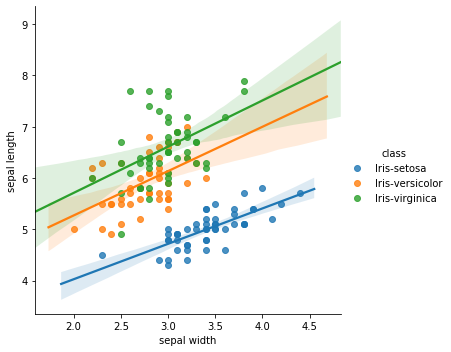

In [10]:
sns.lmplot(x="sepal width",y="sepal length",hue="class", data=df_raw)

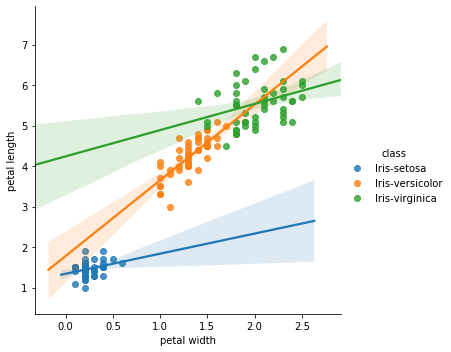

In [11]:
sns.lmplot(x="petal width",y="petal length",hue="class", data=df_raw)
#petal with and petal length is a better feature in terms of deciding class

In [12]:
#Prepare the data for classification
#    - Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. 
#Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

In [13]:
df_raw.replace(to_replace="Iris-setosa",value='1')
df_raw["class"].replace(to_replace="Iris-versicolor",value=2)
df_raw["class"].replace(to_replace="Iris-virginica",value=3);

In [14]:
#mapping the class

df_raw["class"][df_raw["class"]=='Iris-setosa']=1
df_raw["class"][df_raw["class"]=='Iris-versicolor']=2
df_raw["class"][df_raw["class"]=='Iris-virginica']=3
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


C:\Users\zoe.xu\Documents\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zoe.xu\Documents\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\zoe.xu\Documents\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [15]:
#scikit-learn needs the data organized as numpy
x=df_raw[["petal length"]]
y=df_raw[["class"]].values.reshape(-1,1)

In [16]:
import sklearn
model=sklearn.linear_model.LinearRegression().fit(x,y)
print(model.coef_)
print(model.intercept_)

[[0.44064665]]
[0.34375613]


In [17]:
#Split the data into train and test using sklearn train_test_split function/rhttp://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
x=df_raw.drop('class',axis=1)
y=df_raw[["class"]].astype(float)


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/15)
x_train.head()


,sepal length,sepal width,petal length,petal width
45,4.8,3.0,1.4,0.3
83,6.0,2.7,5.1,1.6
142,5.8,2.7,5.1,1.9
24,4.8,3.4,1.9,0.2
85,6.0,3.4,4.5,1.6


In [19]:
# sample size =10
x_test.shape

(10, 4)

In [20]:
y_test.shape

(10, 1)

In [21]:
#Run the fit using KNeighborsClassifier from sklearn.neighbors

knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train.values.ravel())


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [22]:
#prediction model build
prediction=knn.predict(x_test)
prediction

array([1., 3., 1., 3., 2., 3., 2., 2., 3., 2.])

In [23]:
#(3 points) Use learning model to predict the class from features, run prediction on X from test part. 
#•Show the accuracy score of the prediction by comparing predicted iris classes and the Y values from the test.
#•Comparing these two arrays (predicted classes and test Y), count the numbers of correct predictions and predictions that were wrong. (HINTS: NumPy arrays can be compared using == operator. You can also use NumPy's operator count_nonzero to count number of non-False values).


In [24]:
knn.score(x_test, y_test)

1.0

In [25]:
np.unique(prediction)

array([1., 2., 3.])

In [26]:
np.unique(prediction, return_counts=True)


(array([1., 2., 3.]), array([2, 4, 4], dtype=int64))

In [27]:
#result, the accuracy when knn(3) is 96%

In [28]:
#how accuracy score and the number of correct predictions change 
#with the number of neighbors k. We will use the following number
#of neighbors k: 1, 3, 5, 7, 10, 20, 30, 40, and 50:



In [29]:
K_range=[1, 3, 5, 7, 10, 20, 30, 40, 50]
Scores=[]
for k in K_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train.values.ravel())
    prediction=knn.predict(x_test)
    Scores.append(knn.score(x_test, y_test))
print(Scores)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0, 0.9]


In [30]:
# the accuracy rate is decreasing with the increasing in N of knn. 

In [86]:


np.random.random(10)

array([0.09393446, 0.11554712, 0.61412647, 0.99726686, 0.38453705,
       0.80709755, 0.16950085, 0.37993969, 0.13786559, 0.12009752])

In [87]:
#•Generate 10 random train/test splits for each value of k
N_range=np.random.random(10)

Scores_Random_Size=[]
print(N_range)


[0.36816237 0.00964785 0.51612488 0.28361285 0.40177668 0.59652778
 0.17093351 0.3313375  0.31716405 0.6101376 ]


In [88]:
df_KN=pd.DataFrame(columns=['N','K','Accuracy Score'])                  
for N in N_range:
     for K in K_range:
                     df_KN=df_KN.append({'N': N, 'K':K,'Accuracy Score':0.00},ignore_index=True)
             
print(df_KN['N'])

0     0.368162
1     0.368162
2     0.368162
3     0.368162
4     0.368162
5     0.368162
6     0.368162
7     0.368162
8     0.368162
9     0.009648
10    0.009648
11    0.009648
12    0.009648
13    0.009648
14    0.009648
15    0.009648
16    0.009648
17    0.009648
18    0.516125
19    0.516125
20    0.516125
21    0.516125
22    0.516125
23    0.516125
24    0.516125
25    0.516125
26    0.516125
27    0.283613
28    0.283613
29    0.283613
        ...   
60    0.170934
61    0.170934
62    0.170934
63    0.331338
64    0.331338
65    0.331338
66    0.331338
67    0.331338
68    0.331338
69    0.331338
70    0.331338
71    0.331338
72    0.317164
73    0.317164
74    0.317164
75    0.317164
76    0.317164
77    0.317164
78    0.317164
79    0.317164
80    0.317164
81    0.610138
82    0.610138
83    0.610138
84    0.610138
85    0.610138
86    0.610138
87    0.610138
88    0.610138
89    0.610138
Name: N, Length: 90, dtype: float64


In [89]:
#•Fit the model for each split and generate predictions
for N in N_range:
    for K in K_range:
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=N)
        x_train.head()
        knn= KNeighborsClassifier(n_neighbors=K)
        knn.fit(x_train,y_train.values.ravel())
        prediction=knn.predict(x_test)
        Scores_Random_Size.append(knn.score(x_test, y_test))
print(Scores_Random_Size)
    


[0.9821428571428571, 0.9642857142857143, 0.8392857142857143, 0.9821428571428571, 0.9285714285714286, 0.9642857142857143, 0.9642857142857143, 0.8928571428571429, 0.8928571428571429, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9358974358974359, 0.9615384615384616, 0.9743589743589743, 0.9871794871794872, 0.9615384615384616, 0.9487179487179487, 0.9230769230769231, 0.5128205128205128, 0.3333333333333333, 0.9767441860465116, 0.9767441860465116, 0.9534883720930233, 0.9534883720930233, 0.9534883720930233, 0.9767441860465116, 0.9767441860465116, 0.9069767441860465, 0.9302325581395349, 0.9344262295081968, 0.9508196721311475, 0.9672131147540983, 0.9836065573770492, 0.9672131147540983, 0.9836065573770492, 0.9508196721311475, 0.8688524590163934, 0.8032786885245902, 0.9555555555555556, 0.9222222222222223, 0.9777777777777777, 0.9, 0.8888888888888888, 0.9666666666666667, 0.9, 0.6, 0.3111111111111111, 1.0, 0.9615384615384616, 1.0, 1.0, 0.9230769230769231, 0.8846153846153846, 1.0, 0.9230769230769231,

In [103]:
df=pd.DataFrame(np.array(Scores_Random_Size))

In [111]:
#•Average the accuracy score for each k

result=pd.concat([df_KN,df], axis=1, sort=False)


In [119]:
#•Calculate the average number of correct predictions for each k as well
result=result.rename(columns={0: "Scores"})


In [121]:
df2=result.groupby('K').mean()
df2
#the average scores decreases when K increase

,N,Accuracy Score,Scores
K,,,
1.0,0.360543,0.0,0.970045
3.0,0.360543,0.0,0.962287
5.0,0.360543,0.0,0.961959
7.0,0.360543,0.0,0.972211
10.0,0.360543,0.0,0.946676
20.0,0.360543,0.0,0.940083
30.0,0.360543,0.0,0.950366
40.0,0.360543,0.0,0.816346
50.0,0.360543,0.0,0.719561


Text(0, 0.5, 'Testing Accuracy')

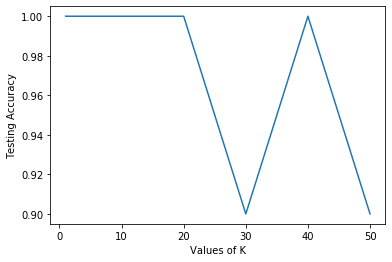

In [123]:
#•Plot the accuracy score for different values of k. What conclusion can you make based on the graph?

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(K_range, Scores)
plt.xlabel('Values of K')
plt.ylabel('Testing Accuracy')

In [ ]:
# with the increase of K, the accuracy will decrease, especially after k go beyond 9